In [ ]:
import pandas as pd
df=pd.read_csv('/content/2015.csv')
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [ ]:
df['_RFHLTH'].value_counts()


1.0    5615
2.0    1958
9.0      39
Name: _RFHLTH, dtype: int64

In [ ]:
df['_RFHLTH'] = df['_RFHLTH'].replace({2: 0})
df['_RFHLTH'].value_counts()

1.0    5615
0.0    1958
9.0      39
Name: _RFHLTH, dtype: int64

In [ ]:
df = df.rename(columns = {'_RFHLTH': 'Label'})

In [ ]:
percentOfData = df.count()*100/9980
percentOfData.where(percentOfData<50).dropna()

CTELENUM    34.599198
PVTRESD1    34.599198
COLGHOUS     0.000000
STATERES    34.599198
CELLFON3    34.599198
              ...    
PAVIG11_    45.370741
PAVIG21_    45.100200
PA1VIGM_    45.891784
_FLSHOT6    26.503006
_PNEUMO2    26.503006
Length: 172, dtype: float64

In [ ]:
badFeatures = percentOfData.where(percentOfData<50).dropna()

In [ ]:
df = df.drop(columns = badFeatures.index.to_list())

In [ ]:
df = df.select_dtypes(include=['float64'])

In [ ]:
df = df.drop(columns=['SEX','_STATE','FMONTH','SEQNO','DISPCODE','MARITAL','EDUCA', 'PHYSHLTH', 'GENHLTH', 'HLTHPLN1', 'MENTHLTH'])

In [ ]:
from IPython.display import HTML
HTML(pd.DataFrame(df.dtypes).to_html())

,0
_PSU,float64
PERSDOC2,float64
MEDCOST,float64
CHECKUP1,float64
BPHIGH4,float64
BLOODCHO,float64
CHOLCHK,float64
TOLDHI2,float64
CVDINFR4,float64
CVDCRHD4,float64


In [ ]:
from sklearn.model_selection import train_test_split

# Extract the labels
#labels = np.array(df.pop('Label'))

# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(df, df['Label'], test_size = 0.3, random_state = 50)

In [ ]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

In [ ]:
train.columns

Index(['_PSU', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'BPHIGH4', 'BLOODCHO',
       'CHOLCHK', 'TOLDHI2', 'CVDINFR4', 'CVDCRHD4',
       ...
       '_PA30021', '_PASTRNG', '_PAREC1', '_PASTAE1', '_LMTACT1', '_LMTWRK1',
       '_LMTSCL1', '_RFSEAT2', '_RFSEAT3', '_AIDTST3'],
      dtype='object', length=140)

<ipython-input-88-4d22f2215487>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Label'], kde=False)


<Axes: xlabel='Label'>

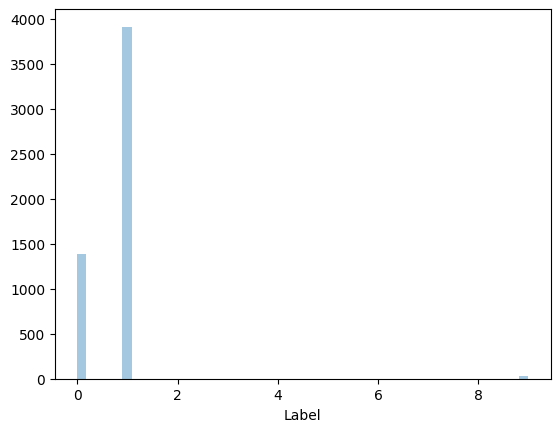

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(train['Label'], kde=False)

In [ ]:
print(train.shape)
print(test.shape)

(5328, 140)
(2284, 140)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=50, max_depth=60)
tree.fit(train, train_labels)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 5 nodes with maximum depth 2.


In [ ]:
features = list(train.columns)
fi = pd.DataFrame({'feature': features,
                   'importance': tree.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

,feature,importance
66,Label,1.0
0,_PSU,0.0
96,_SMOKER3,0.0
90,_BMI5,0.0
91,_BMI5CAT,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100,
                               random_state=50,
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
#RSEED = 50
# Fit on training data
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.7s finished


RandomForestClassifier(n_jobs=-1, random_state=50, verbose=1)

In [ ]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 636
Average maximum depth 19


In [ ]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head(10)

,feature,importance
66,Label,0.424878
31,DIFFWALK,0.033464
27,QLACTLM2,0.028536
21,EMPLOY1,0.027111
33,DIFFALON,0.024474
30,DECIDE,0.013642
136,_LMTSCL1,0.012953
28,USEEQUIP,0.012058
32,DIFFDRES,0.010765
134,_LMTACT1,0.010249
